# Basic ML Classifiers

In [1]:
import os
from os import path

import numpy as np
import cv2
from skimage import io, color, transform
import matplotlib.pyplot as plt

In [2]:
def resize_image(img, size, padding=255):
    '''
    Resize the given image to specified size
    Inputs:
        img = Image to be resized (Numpy NDArray)
        size = Scalar value. Image will be resized to (size, size)
    Returns:
        reszd_img = Resized image (Numpy NDArray)
    '''
    # Append zeros or ones based on the choice of padding
    # to maintain the aspect ratio of the image
    rows, cols = img.shape[:2]
    max_size = max(rows, cols)
    canvas = np.ones((max_size, max_size), np.uint8) * padding
    
    # Place the actual image at the center of the canvas
    c_x, c_y = max_size / 2, max_size / 2
    x_beg = max(0, int(c_x - (cols / 2)))
    y_beg = max(0, int(c_y - (rows / 2)))
    x_end, y_end = x_beg + cols, y_beg + rows
    print(y_beg, x_beg, x_beg, x_end)
    canvas[y_beg: y_end, x_beg: x_end] = img
        
    # Resize the image and write to op_dir_path specified
    #reszd_img = transform.resize(canvas, (size, size))
    reszd_img = cv2.resize(canvas, (size, size))
    reszd_img = np.asarray(reszd_img, np.uint8)
    # reszd_img = np.asarray(reszd_img * 255, np.uint8)
    return reszd_img

In [3]:
def extract_features(image):
    '''
    Extract the features from the Image
    '''
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_img = resize_image(gray_img, 250)
    gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    
    # Binarize the image using Adaptive thresholding
    th, bin_img = cv2.threshold(gray_img, 250, 255, cv2.THRESH_BINARY_INV)
    
    # Close the holes by Morphological operations (Erosion and Dilation)
    struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    smooth_bin_img = cv2.erode(bin_img, struct_elem, iterations=1)
    smooth_bin_img = cv2.dilate(smooth_bin_img, struct_elem, iterations=2)
    
    # Find all the contours from the binary image
    img, contours, heirarchy = cv2.findContours(smooth_bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the circularity
    x, y, w, h = cv2.boundingRect(contours[0])
    rect_area = w * h
    contour_area = cv2.contourArea(contours[0])
    circularity = contour_area / rect_area
    
    # Find the compactness
    mask_img = np.zeros_like(smooth_bin_img)
    mask_img = cv2.drawContours(mask_img, [contours[0]], -1, 255, -1)
    white_mask_img = cv2.bitwise_and(smooth_bin_img, smooth_bin_img, mask=mask_img)
    white_area = cv2.countNonZero(white_mask_img)
    compactness = white_area / contour_area
    
    features = [circularity, compactness]
    
    return features

In [4]:
def load_data_from_imgs(data_dir, class_label):
    '''
    Read images from the data directory
    Extract features from images and load that into array
    '''
    all_features = []
    for img_name in os.listdir(data_dir):
        img_path = path.join(data_dir, img_name)
        image = cv2.imread(img_path)
        img_features = extract_features(image)
        img_features.append(class_label)
        all_features.append(img_features)
    all_features = np.array(all_features, np.float)
    return all_features

In [5]:
def test_model(model, X, y):
    '''
    Test the trained model with the test data
    '''
    pred_acc_list = []
    for sample, label in zip(X, y):
        pred = model.predict(sample.reshape(1, -1))[0]
        pred_acc_list.append(int(pred) == int(label))
    accuracy = sum(pred_acc_list) / float(len(pred_acc_list)) * 100
    return accuracy

In [6]:
data_dir = '../data/nuts_n_bolts_master/all_svm/'
train_dir = path.join(data_dir, 'train')
test_dir = path.join(data_dir, 'test')

# Collect the Training and Test data
nuts_class, bolts_class = 0, 1
train_nuts_data = load_data_from_imgs(path.join(train_dir, 'nuts'), nuts_class)
train_bolts_data = load_data_from_imgs(path.join(train_dir, 'bolts'), bolts_class)
train_data = np.append(train_nuts_data, train_bolts_data, axis=0)
np.random.shuffle(train_data)

# Test data
test_nuts_data = load_data_from_imgs(path.join(test_dir, 'nuts'), nuts_class)
test_bolts_data = load_data_from_imgs(path.join(test_dir, 'bolts'), bolts_class)
test_data = np.append(test_nuts_data, test_bolts_data, axis=0)
np.random.shuffle(test_data)

0 0 0 360
0 0 0 500
0 0 0 200
0 0 0 300
0 0 0 2100
0 0 0 250
0 0 0 750
0 16 16 199
0 3 3 224
0 0 0 225
0 0 0 225
0 2 2 247
0 0 0 1000
0 0 0 500
0 0 0 300
0 0 0 250
0 0 0 500
3 0 0 300
0 0 0 1000
0 0 0 250
40 0 0 386
12 0 0 600
0 0 0 2100
0 0 0 250
0 0 0 342
0 0 0 330
0 0 0 500
0 0 0 400
0 0 0 800
40 0 0 386
18 0 0 244
0 0 0 450
0 0 0 400
57 0 0 1600
0 0 0 1024
0 0 0 250
0 0 0 250
0 0 0 276
54 0 0 900
0 0 0 400
0 0 0 250
0 0 0 300
0 0 0 800
0 0 0 2100
0 0 0 250
1 0 0 342
125 0 0 573
8 0 0 300
0 0 0 450
0 0 0 342
0 22 22 422
0 0 0 300
0 3 3 345
0 0 0 100
22 0 0 248
5 0 0 342
0 0 0 250
0 0 0 500
0 0 0 500
0 0 0 225
5 0 0 1267
0 0 0 281
0 0 0 250
89 0 0 423
0 2 2 502
36 0 0 264
0 0 0 330
0 0 0 500
56 0 0 661
0 0 0 100
0 0 0 200
0 0 0 250
0 0 0 720
74 0 0 444
108 0 0 480
0 1 1 319
0 0 0 480
0 0 0 500
0 0 0 250
62 0 0 374
62 0 0 374
0 0 0 250
0 0 0 224
34 0 0 381
0 0 0 500
151 0 0 600
0 0 0 250
0 0 0 225
0 0 0 218
0 0 0 1000
0 0 0 300
0 0 0 200
0 4 4 495
0 0 0 200
0 0 0 224
0 0 0 250
62 0 0 

In [7]:
from sklearn import tree
X, y = train_data[:, :2], train_data[:, 2]
test_X, test_y = test_data[:, :2], test_data[:, 2]
dec_tr_clf = tree.DecisionTreeClassifier()
dec_tr_clf = dec_tr_clf.fit(X, y)

In [8]:
print('Accuracy', test_model(dec_tr_clf, test_X, test_y))

Accuracy 89.36170212765957


In [9]:
import graphviz 
dot_data = tree.export_graphviz(dec_tr_clf, out_file=None,
                                feature_names=['circularity', 'compactness'],
                                class_names=['Nut', 'Bolt'],
                                filled=True, rounded=True,
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("Nuts and Bolts")
graph

ImportError: No module named 'graphviz'

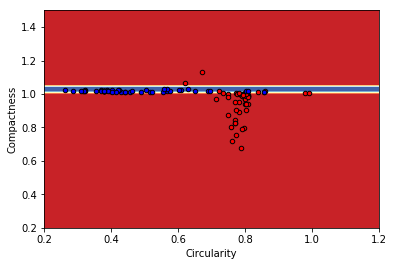

In [10]:
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = dec_tr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel('Circularity')
plt.ylabel('Compactness')
target_names = ['Nut', 'Bolt']

# Plot the training points
for i, color in zip(range(2), 'rb'):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=20)
plt.xlim([0.2, 1.2])
plt.ylim([0.2, 1.5])
plt.show()

## Logistic Regression

In [11]:
from sklearn import linear_model
log_reg_clf = linear_model.LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
log_reg_clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
import cv2 as cv
#import cv2
# svm_params = dict( kernel_type = cv2.SVM_LINEAR,
#                    svm_type = cv2.SVM_C_SVC,
#                    C=2.67, gamma=5.383 )
# svm = cv2.SVM()
# svm.train(X,Y, params=svm_params)
# svm.save('svm_data.dat')
# result = svm.predict_all(test_X)


#svm = cv2.ml.SVM_create()
#svm.setType(cv2.ml.SVM_C_SVC)
#svm.setKernel(cv2.ml.SVM_LINEAR)
#svm.setDegree(0.0)
#svm.setGamma(0.0)
#svm.setCoef0(0.0)
#svm.setC(0)
#svm.setNu(0.0)
#svm.setP(0.0)
#svm.setClassWeights(None)
#svm.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 100, 1.e-06))
#rint(X,y)

svm = cv.ml.SVM_create()
svm.setType(cv.ml.SVM_C_SVC)
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setGamma(5.383)
svm.setC(2.67)
svm.setTermCriteria((cv.TERM_CRITERIA_COUNT, 100, 1e-6))

#X = np.asarray(X, dtype = np.float32).reshape(X.shape[0], 1, X.shape[1])
X = np.asarray(X, dtype = np.float32)
y = np.asarray(y, dtype = np.int32)
test_X = np.asarray(test_X, dtype = np.float32)

#X = np.matrix([[501, 10], [255, 10], [501, 255], [10, 501]], dtype=np.float32)
#y = np.array([1, -1, -1, -1])


print(X.shape, y.shape)
print(X[0])
svm.train(X, cv.ml.ROW_SAMPLE, y)
_, result = svm.predict(test_X)
#print(result)
result = result.reshape(result.shape[0])
mask = np.equal(result,test_y)
print(mask.shape, result.shape, test_y.shape, test_X.shape)
correct = len([1 for label in mask if label == True])
print(correct)
print(result.size)
print(correct*100.0/result.size)
svm.save('svm_data.dat')

(100, 2) (100,)
[ 0.79887486  0.96896243]
(47,) (47,) (47,) (47, 2)
38
47
80.85106382978724


In [13]:
import cv2
svm = cv2.ml.SVM_load('./svm.dat')
image = cv2.imread('/home/senthil/Personal/workshop/ahws_17/examples/data/nuts_bolts_v1/bolt.jpg')
image_features = extract_features(image).reshape(1, image_features.shape[0])
_, result = svm.predict(image_features)
print(result)




AttributeError: 'module' object has no attribute 'SVM_load'

In [19]:
print('Logistic Regression Accuracy = ', test_model(log_reg_clf, test_X, test_y))

Logistic Regression Accuracy =  87.2340425531915


### Logistic Regression Visualization

In [2]:
h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot also the training points
y_clrs = ['r' if elem==0 else 'b' for elem in y]
plt.scatter(X[:, 0], X[:, 1], c=y_clrs, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Circularity')
plt.ylabel('Compactness')

plt.xlim([0.1, 1.2])
plt.ylim([0.2, 1.5])

plt.show()

NameError: name 'X' is not defined